In [1]:
# 파이썬에서 world bank data를 받을 수 있는 package를 먼저 설치해야함.
# conda install wbdata 혹은 pip install wbdata 둘 중 한가지를 명령어 창에 입력하면 자동으로 설치됨.
#설치 완료후, 
import wbdata # wbdata package 불러오기
import pandas as pd, numpy as np # dataframe 수정하는데 사용하는 pandas와 numpy 불러오기
import os # 작업할 문서공간 설정 불러오기
from matplotlib import pyplot as plt # 그래프 그리는데 필요한 package

In [2]:
os.chdir('/Users/kyuyeonhwang/Desktop/Data/World bank') # 작업할 폴더공간 설정

In [3]:
wbdata.get_topic() # world bank data중 어떤 파일을 불러올지 확인

  id  value
----  -------------------------------
   1  Agriculture & Rural Development
   2  Aid Effectiveness
   3  Economy & Growth
   4  Education
   5  Energy & Mining
   6  Environment
   7  Financial Sector
   8  Health
   9  Infrastructure
  10  Social Protection & Labor
  11  Poverty
  12  Private Sector
  13  Public Sector
  14  Science & Technology
  15  Social Development
  16  Urban Development
  17  Gender
  18  Millenium development goals
  19  Climate Change
  20  External Debt
  21  Trade

In [4]:
wbdata.get_indicator(topic=3) 
# 위에서 관심있는 카테고리를 선택했으면, 해당 카테고리에서 제공하는 구체적인 데이터가 무엇이 있는지 확인
# 여기서는 예시로 경제성장과 관련된 카테고리를 선택할 것임.

id                         name
-------------------------  -------------------------------------------------------------------------------------------
5.0.AMeanIncGr.All         Annualized Mean Income Growth (2004-2014)
5.0.AMeanIncGr.B40         Annualized Mean Income Growth Bottom 40 Percent (2004-2014)
5.1.AMeanIncGr.All         Annualized Mean Income Growth (2004-2009)
5.1.AMeanIncGr.B40         Annualized Mean Income Growth Bottom 40 Percent (2004-2009)
5.2.AMeanIncGr.All         Annualized Mean Income Growth (2009-2014)
5.2.AMeanIncGr.B40         Annualized Mean Income Growth Bottom 40 Percent (2009-2014)
6.0.Conspc                 Consumption per capita (2011 $)
6.0.GDP_current            GDP (current $)
6.0.GDP_growth             GDP growth (annual %)
6.0.GDP_usd                GDP (constant 2005 $)
6.0.GDPpc_constant         GDP per capita, PPP (constant 2011 international $)
6.0.GNIpc                  GNI per capita (2011 $)
9.0.Labor.B40              Labor Force Participatio

In [5]:
indicators={"DT.TDS.DECT.EX.ZS":"debt", "FP.CPI.TOTL.ZG":"inflation", "NY.GDP.PCAP.KD.ZG":"gdp growth per"}
# 이중에서 원하는 데이터를 indicator로 설정. 하나를 설정해도 되고, 여러개를 설정해도 됨. 여기에서는 세가지 정도를 선택해 보겠음.
# indicators={"id":"내가 설정하고 싶은 명칭"}

In [6]:
wbdata.get_country()
# 어느나라 데이터를 불러올것인지 나라목록을 살펴볼 수 있음.

id    name
----  --------------------------------------------------------------------------------
ABW   Aruba
AFE   Africa Eastern and Southern
AFG   Afghanistan
AFR   Africa
AFW   Africa Western and Central
AGO   Angola
ALB   Albania
AND   Andorra
ARB   Arab World
ARE   United Arab Emirates
ARG   Argentina
ARM   Armenia
ASM   American Samoa
ATG   Antigua and Barbuda
AUS   Australia
AUT   Austria
AZE   Azerbaijan
BDI   Burundi
BEA   East Asia & Pacific (IBRD-only countries)
BEC   Europe & Central Asia (IBRD-only countries)
BEL   Belgium
BEN   Benin
BFA   Burkina Faso
BGD   Bangladesh
BGR   Bulgaria
BHI   IBRD countries classified as high income
BHR   Bahrain
BHS   Bahamas, The
BIH   Bosnia and Herzegovina
BLA   Latin America & the Caribbean (IBRD-only countries)
BLR   Belarus
BLZ   Belize
BMN   Middle East & North Africa (IBRD-only countries)
BMU   Bermuda
BOL   Bolivia
BRA   Brazil
BRB   Barbados
BRN   Brunei Darussalam
BSS   Sub-Saharan Africa (IBRD-only countries)
BTN   Bhutan
BWA  

In [7]:
countries=['LIC','LMC','LMY','HIC']
# indicator와 마찬가지로 나라 1개를 선택해도 되고, 여러 국가를 선택해도 됨.
# 여기서는 특정국가보다는, High income, low income, lower-middle income, low&middle income 국가의 묶음들을 선택하겠음.

In [8]:
df = wbdata.get_dataframe(indicators, country=countries)
# data indicator와 국가를 선택했으니, 이걸 이용하여 dataframe을 만들어볼 것임.
# 이 dataframe을 바로 사용하여 그래프로 그려봐도 되지만, 누락된 데이터는 없는지, 누락된 데이터를 없애고 그래프화 시키는 것 등등을 시행해 보겠음.

In [9]:
df2 = df.copy()
# 우선 위에 df 데이터 프레임을 복사하여 df2라는 데이터 프레임을 생성.

In [10]:
df2

debt  inflation  gdp growth per
country             date                                 
High income         2021   NaN   2.508352        5.259041
                    2020   NaN   0.537288       -4.657229
                    2019   NaN   1.570832        1.330908
                    2018   NaN   1.831883        1.859884
                    2017   NaN   1.551898        1.859115
...                        ...        ...             ...
Low & middle income 1964   NaN        NaN        5.145628
                    1963   NaN        NaN        2.128249
                    1962   NaN        NaN        1.567839
                    1961   NaN        NaN       -0.429430
                    1960   NaN        NaN             NaN

[248 rows x 3 columns]

In [11]:
df2.reset_index(inplace=True)
# df의 기존 인덱스는 country와 date로 되어있지만, 이를 재설정해줌. 이래야 나중에 데이터로 plot하기 편해짐.
df2

,country,date,debt,inflation,gdp growth per
0,High income,2021,NaN,2.508352,5.259041
1,High income,2020,NaN,0.537288,-4.657229
2,High income,2019,NaN,1.570832,1.330908
3,High income,2018,NaN,1.831883,1.859884
4,High income,2017,NaN,1.551898,1.859115
...,...,...,...,...,...
243,Low & middle income,1964,NaN,NaN,5.145628
244,Low & middle income,1963,NaN,NaN,2.128249
245,Low & middle income,1962,NaN,NaN,1.567839
246,Low & middle income,1961,NaN,NaN,-0.429430


In [12]:
df2['text']=df2['country']+df2['date']
# df2 데이터 프레임에 text라는 새로운 항목을 만들어 줌.
# 이거는 각각의 데이터들(debt, inflation, gdp growth per)이 위에 내가 고른 나라들 중 어떤 국가의 어떤 시점의 데이터인지를 표시해줌.

In [13]:
df2['inflation'].mean()
# df2 데이터 프레임을 활용하여 평균이나, 기초통계정보를 확인 할 수 있음.

6.5562409178773144

In [14]:
df2['gdp growth per'].describe()
# df2 데이터 프레임을 활용하여 평균이나, 기초통계정보를 확인 할 수 있음.

count    223.000000
mean       2.068838
std        2.266722
min       -6.560763
25%        0.767162
50%        2.304393
75%        3.574420
max        7.424948
Name: gdp growth per, dtype: float64

In [15]:
df2['debt'].mean()

16.318006601728783

In [16]:
df_selyrs=df2[(df2['date']>=2000)]
# 원하는 데이터들의 기간도 정할 수 있음. 
# 만약, 어떤 기간과 기간사이의 데이터값을 원하면, 
# df_selyrs=df2[(df2['date']>=2000) & (df2['date']<=2016)] 
# 위와같이 설정하여 데이터를 활용할 수 있음.

TypeError: '>=' not supported between instances of 'str' and 'int'

In [17]:
# 그런데 간혹가다, 위에 명령어로 기간설정을 할 경우 오류메시지가 나올 수 있는데, 긴장하지 말고 다음과 같이 하면 됨.

df2['date']=pd.to_numeric(df2['date'])
df_selyrs=df2[(df2['date']>=2000)]

# 오류가 나는 이유는, 부등식이 위에식의 행과 열에서 적용이 되지 않아서 그럼. 이럴때는 Unstack을 바로 사용하면 되지만, 지금처럼 해도 괜찮음.

In [18]:
df_selyrs
# 2000년 이후부터 데이터를 가져왔음.

,country,date,debt,inflation,gdp growth per,text
0,High income,2021,NaN,2.508352,5.259041,High income2021
1,High income,2020,NaN,0.537288,-4.657229,High income2020
2,High income,2019,NaN,1.570832,1.330908,High income2019
3,High income,2018,NaN,1.831883,1.859884,High income2018
4,High income,2017,NaN,1.551898,1.859115,High income2017
...,...,...,...,...,...,...
203,Low & middle income,2004,14.321491,4.678438,6.172553,Low & middle income2004
204,Low & middle income,2003,18.666132,5.140448,4.518313,Low & middle income2003
205,Low & middle income,2002,21.366248,4.297152,3.251527,Low & middle income2002
206,Low & middle income,2001,22.725540,5.147468,2.248530,Low & middle income2001


In [19]:
df_selyrs.info()
# 2000년 이후로 설정한 새로운 데이터 프레임에 변수가 누락된 기간이 있는지 살펴볼 것임. 필요하다면 누락된 기간을 지울 수 있음.
# 데이터를 보면 debt 숫자만 22개나 부족함, 즉 debt에서 22개의 누락변수가 존재함. 그런데 이것이 한 국가에서 누락된건지, 아니면 4개 국가에서 똑같이 
# 없는지 확인해봐도 됨.

<class 'wbdata.api.WBDataFrame'>
Int64Index: 88 entries, 0 to 207
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         88 non-null     object 
 1   date            88 non-null     int64  
 2   debt            66 non-null     float64
 3   inflation       88 non-null     float64
 4   gdp growth per  88 non-null     float64
 5   text            88 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 4.8+ KB


In [20]:
dfnas=df_selyrs[df_selyrs['debt'].isnull()]
dfnas
# 확인결과 High income 국가에서 debt 자료가 아예 없음, 이때 text를 아까 설정해준 덕분에 확인이 편함.

,country,date,debt,inflation,gdp growth per,text
0,High income,2021,NaN,2.508352,5.259041,High income2021
1,High income,2020,NaN,0.537288,-4.657229,High income2020
2,High income,2019,NaN,1.570832,1.330908,High income2019
3,High income,2018,NaN,1.831883,1.859884,High income2018
4,High income,2017,NaN,1.551898,1.859115,High income2017
5,High income,2016,NaN,0.443259,1.253882,High income2016
6,High income,2015,NaN,0.319696,1.794387,High income2015
7,High income,2014,NaN,1.033172,1.509959,High income2014
8,High income,2013,NaN,1.471559,0.921126,High income2013
9,High income,2012,NaN,2.597414,0.851684,High income2012


In [21]:
df3=df_selyrs.dropna(subset=['debt'])

In [22]:
df3.shape

(66, 6)

In [23]:
df3

,country,date,debt,inflation,gdp growth per,text
62,Low income,2021,16.803817,5.750369,-0.814564,Low income2021
63,Low income,2020,12.103991,5.197710,-2.754139,Low income2020
64,Low income,2019,13.801465,2.867588,0.875614,Low income2019
65,Low income,2018,11.451009,4.092978,0.338896,Low income2018
66,Low income,2017,9.407250,8.156863,0.232312,Low income2017
...,...,...,...,...,...,...
203,Low & middle income,2004,14.321491,4.678438,6.172553,Low & middle income2004
204,Low & middle income,2003,18.666132,5.140448,4.518313,Low & middle income2003
205,Low & middle income,2002,21.366248,4.297152,3.251527,Low & middle income2002
206,Low & middle income,2001,22.725540,5.147468,2.248530,Low & middle income2001


In [24]:
# 원한다면 특정 년도의 데이터만 뽑아서 볼 수 있음.

df2016=df3[df3['date']==2016]

In [25]:
df2016.sort_values(by='inflation', ascending=False)
# 2016년도의 데이터를 인플레이션이 높은 기준으로 정렬해봤음. High income 국가는 debt 데이터가 없어서 밑에 표에 표시가 안됨.

,country,date,debt,inflation,gdp growth per,text
67,Low income,2016,10.483805,6.035759,-0.312367,Low income2016
129,Lower middle income,2016,16.487281,3.219887,4.181841,Lower middle income2016
191,Low & middle income,2016,15.372175,2.821708,3.219051,Low & middle income2016


In [26]:
# 이제 우리가 원하는 데이터들을 plot해 보겠음.
# plot하기 전에, python에서는 시계열 데이터의 경우 시간이 row로 설정이 되어있어야 하기 때문에 데이터 프레임을 바꿔줄것임.
dfsu = df_selyrs.unstack(level=0)

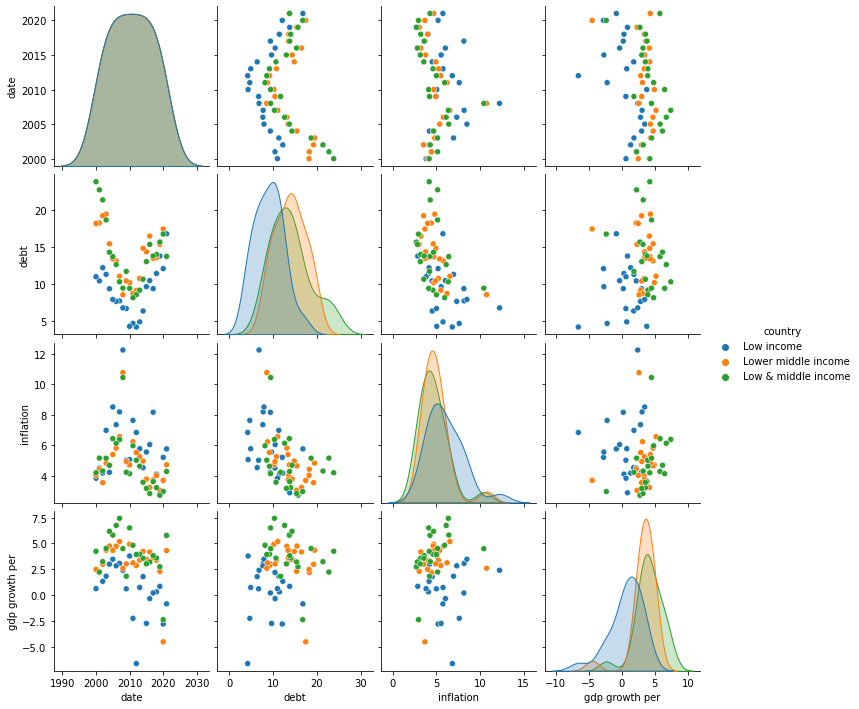

In [27]:
import seaborn as sns
sns.pairplot(data=df3, hue="country")

# pairplot을 통해, 변수간 연도별 진행단계를 확인할 수 있음. date가 x축이라, 보통 첫행 그래프 보는게 편함. 이거를 따로 scatter로 표현도 가능.
# 여기서는 df_selyrs 기간이 짧은거 같아서, 일부러 df3 데이터 프레임을 사용함.

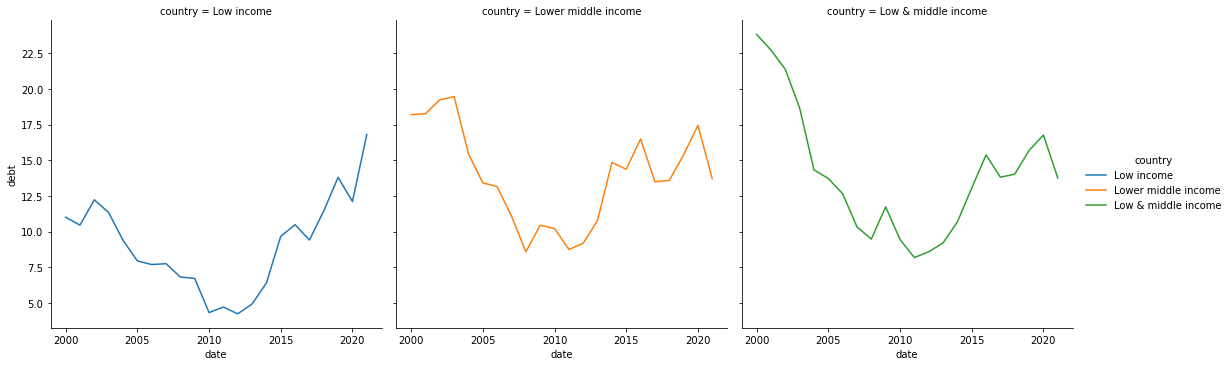

In [28]:
sns.relplot(data=df3, x="date", y="debt", kind="line", hue="country", col='country')

# 이렇게 원하는 데이터만 나라별로 뽑아서 plot을 할 수 있음.

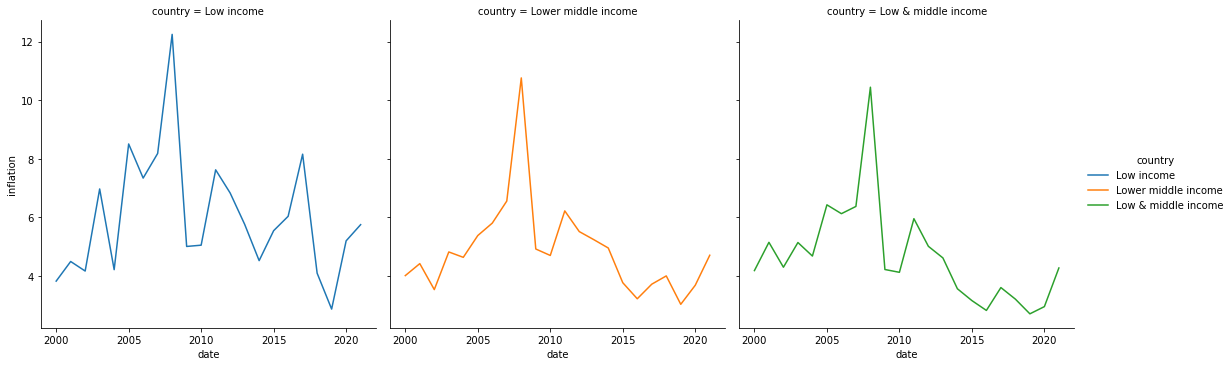

In [29]:
sns.relplot(data=df3, x="date", y="inflation", kind="line", hue="country", col='country')

# 이렇게 원하는 데이터만 나라별로 뽑아서 plot을 할 수 있음

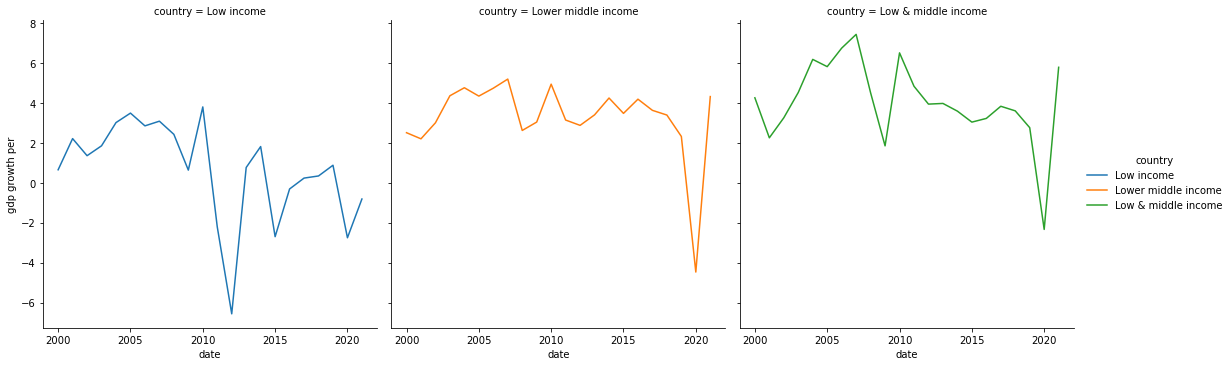

In [30]:
sns.relplot(data=df3, x="date", y="gdp growth per", kind="line", hue="country", col='country')

# 이렇게 원하는 데이터만 나라별로 뽑아서 plot을 할 수 있음
# 1인당 gdp 증가율이 인플레이션과 다르게 움직이고, 부채와도 반대로 움직이는거 같음.

In [31]:
dfu=df.unstack(level=0)

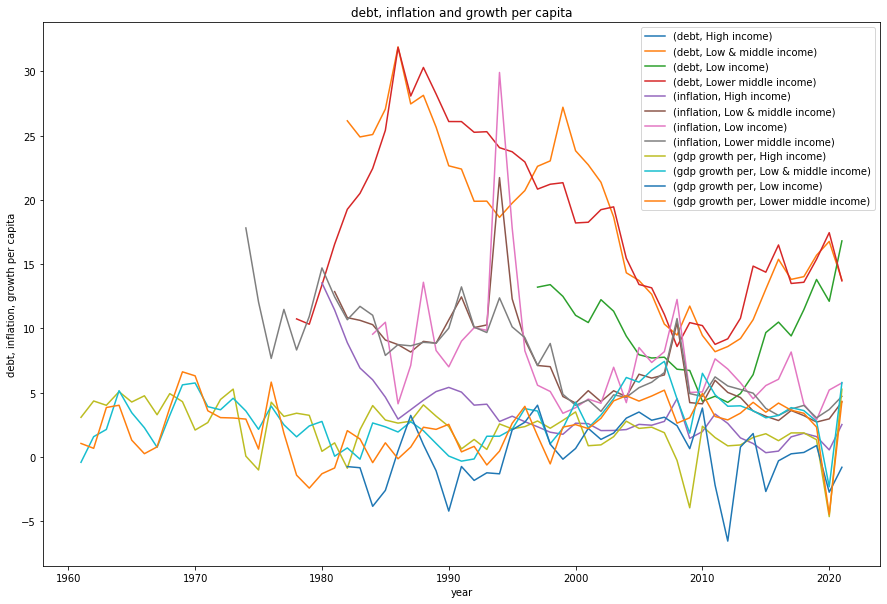

In [32]:
# 아까 위에서 데이터 프레임을 unstack으로 바꿔준 데이터를 사용해서 plot을 해보면

dfu.plot(figsize=(15,10));
plt.legend(loc='best');
plt.title("debt, inflation and growth per capita");
plt.xlabel('year');
plt.ylabel('debt, inflation, growth per capita');